In [1]:
import numpy as np
import pandas as pd
import pmdarima as pmd
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import csv

/var/folders/kb/sw0dnpps1cx45xw8zvrdypc80000gq/T/ipykernel_6037/3249253163.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [12]:
df = pd.read_csv("/Users/mrobredo23/OULU/PROMISE-TDpred2024/data/complete_data/archiva.csv")
df

,SQALE_INDEX,COMMIT_DATE,S1213,RedundantThrowsDeclarationCheck,S00117,S00122,S1488,S1905,UselessImportCheck,DuplicatedBlocks,S1226,S00112,S1155,S00108,S1151,S1132,S1481
0,0,2005-11-28 03:15:35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,280,2005-11-29 01:34:22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,285,2005-11-29 02:25:03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,323,2005-11-29 03:11:23,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
4,347,2005-11-29 04:01:17,0,0,0,0,0,0,0,1,0,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625,121702,2012-02-17 22:50:39,17,142,8,0,34,12,68,155,18,110,10,3,2,52,15
1626,121706,2012-02-18 00:18:07,17,142,8,0,34,12,68,155,18,110,10,3,2,52,15
1627,121696,2012-02-18 00:18:30,17,142,8,0,34,12,68,155,18,110,10,3,2,52,15
1628,121712,2012-02-23 21:25:20,17,142,8,0,34,12,68,155,18,110,10,3,2,52,15


In [3]:
df = pd.read_csv("/Users/mrobredo23/OULU/PROMISE_TDpred2024/data/biweekly_data/archiva.csv")
df

,COMMIT_DATE,SQALE_INDEX,S1213,RedundantThrowsDeclarationCheck,S00117,S00122,S1488,S1905,UselessImportCheck,DuplicatedBlocks,S1226,S00112,S1155,S00108,S1151,S1132,S1481
0,2005-11-28 03:15:35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2005-12-12 08:09:34,4540.0,0.0,2.0,0.0,2.0,1.0,0.0,15.0,9.0,0.0,0.0,4.0,0.0,0.0,39.0,20.0
2,2005-12-27 02:34:36,6607.0,0.0,5.0,0.0,3.0,1.0,0.0,33.0,9.0,0.0,0.0,4.0,3.0,0.0,45.0,8.0
3,2006-01-15 00:30:24,5929.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,12.0,0.0,3.0,6.0,0.0,0.0,0.0,1.0
4,2006-01-30 02:51:46,7754.0,0.0,17.0,0.0,1.0,0.0,0.0,1.0,10.0,0.0,9.0,6.0,0.0,0.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2011-12-19 22:38:00,108851.0,17.0,142.0,7.0,0.0,24.0,12.0,68.0,136.0,18.0,108.0,10.0,3.0,2.0,41.0,15.0
132,2012-01-04 08:49:50,110243.0,17.0,142.0,8.0,0.0,34.0,12.0,68.0,145.0,18.0,112.0,10.0,3.0,2.0,52.0,15.0
133,2012-01-18 13:43:23,110861.0,17.0,142.0,8.0,0.0,34.0,12.0,68.0,146.0,18.0,112.0,10.0,3.0,2.0,52.0,15.0
134,2012-02-02 20:39:36,121632.0,17.0,142.0,8.0,0.0,34.0,12.0,70.0,152.0,18.0,110.0,10.0,3.0,2.0,52.0,15.0


In [10]:
df.columns[1:]

Index(['SQALE_INDEX', 'S1213', 'RedundantThrowsDeclarationCheck', 'S00117',
       'S00122', 'S1488', 'S1905', 'UselessImportCheck', 'DuplicatedBlocks',
       'S1226', 'S00112', 'S1155', 'S00108', 'S1151', 'S1132', 'S1481'],
      dtype='object')

# Trying auto_arima

In [3]:
df = pd.read_csv("/Users/mrobredo23/OULU/PROMISE-TDpred2024/data/monthly_data/felix.csv")
df.COMMIT_DATE = pd.to_datetime(df.COMMIT_DATE)

# Dependent variable
sqale_index = df.SQALE_INDEX.to_numpy()

# Independent variables
xregressors = df.iloc[:, 2:].to_numpy()

# Initial data splitting.
split_point = round(len(sqale_index))
training_sqale = sqale_index[:split_point]
testing_sqale = sqale_index[split_point:]
training_xregressors = xregressors[:split_point]
testing_xregressors = xregressors[split_point:]

variable_names = df.columns[1:]
xregresors_names = variable_names[1:]

In [98]:
def optimal_d(series, max_d=3):
    """Determine optimal d by checking stationarity with ADF test."""
    for d in range(max_d + 1):
        adf_result = adfuller(np.diff(series,n=d))
        p_value = adf_result[1]
        print(p_value)
        if p_value < 0.05:  # Series is stationary
            return d
    return max_d

optimal_d(sqale_index)

0.9967077308437747
3.8106766471530434e-05


1

In [95]:
sqale_index

array([ 25998.,  26244.,  26490.,  25141.,  28171.,  26317.,  22667.,
        47372.,  56041.,  64022.,  79151.,  79602.,  96367.,  82848.,
        83558.,  83761.,  84040.,  84371.,  89351.,  89872.,  89400.,
        93054.,  95090.,  99519., 100268., 100376., 100718., 105275.,
       113126., 163907., 181760., 183540., 192623., 198636., 206333.,
       215808., 224951., 227954., 225041., 227013., 230897., 246986.,
       253394., 283530.])

In [29]:
df

,COMMIT_DATE,SQALE_INDEX,S1213,RedundantThrowsDeclarationCheck,S00117,S00122,S1488,S1905,UselessImportCheck,DuplicatedBlocks,S1226,S00112,S1155,S00108,S1151,S1132,S1481
0,2005-08-16 18:33:34,25998.0,25.0,21.0,34.0,49.0,9.0,34.0,4.0,45.0,72.0,69.0,18.0,19.0,25.0,21.0,5.0
1,2005-09-15 18:33:34,26244.0,25.0,21.0,34.0,49.5,9.0,34.5,5.0,47.0,72.0,69.0,18.0,19.0,25.0,21.0,5.0
2,2005-10-30 07:47:41,26490.0,25.0,21.0,34.0,50.0,9.0,35.0,6.0,49.0,72.0,69.0,18.0,19.0,25.0,21.0,5.0
3,2005-12-03 16:32:50,25141.0,26.0,22.0,34.0,49.0,9.0,34.0,4.0,49.0,72.0,69.0,18.0,19.0,25.0,24.0,5.0
4,2006-01-13 13:55:13,28171.0,64.0,22.0,42.0,57.0,9.0,35.0,4.0,49.0,73.0,70.0,18.0,19.0,26.0,39.0,5.0
5,2006-02-13 15:46:16,26317.0,60.0,20.0,40.0,58.0,6.0,36.0,7.0,45.0,78.0,71.0,17.0,16.0,26.0,40.0,5.0
6,2006-03-16 15:57:37,22667.0,61.0,26.0,15.0,65.0,6.0,19.0,7.0,38.0,77.0,51.0,20.0,21.0,14.0,38.0,2.0
7,2006-04-19 14:43:32,47372.0,91.0,31.0,58.0,128.0,13.0,22.0,12.0,77.0,94.0,96.0,38.0,43.0,34.0,137.0,9.0
8,2006-05-24 07:42:30,56041.0,105.0,36.0,62.0,139.0,15.0,24.0,20.0,97.0,101.0,103.0,43.0,48.0,41.0,183.0,10.0
9,2006-06-24 15:03:17,64022.0,111.0,38.0,63.0,266.0,18.0,29.0,20.0,118.0,117.0,107.0,45.0,45.0,53.0,230.0,10.0


In [ ]:
arima_model = pmd.arima.auto_arima(y=training_sqale, X=training_xregressors, start_p=0, start_q=0, max_p=5, max_q=5, d=1, D=1, max_d=3, max_D=3, start_P=0, start_Q=0, max_P=5, max_Q=5, test="adf", m=12, seasonal=True, stepwise=False, enforce_stationarity=True, error_action='trace', trace=True, suppress_warnings=False, stationary=False)

In [109]:
arima_model

AttributeError: 'ARIMA' object has no attribute 'mle_retvals'

In [108]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   44
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -391.794
Date:                Thu, 15 Feb 2024   AIC                            815.587
Time:                        16:57:04   BIC                            843.766
Sample:                             0   HQIC                           825.979
                                 - 44                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -41.2569     20.388     -2.024      0.043     -81.216      -1.298
x2            21.0786     62.000      0.340      0.734    -100.439     142.596
x3            81.8755     22.120      3.701      0.0

In [65]:
adfuller(np.log(training_sqale))

(-1.0707250592431856,
 0.72660413468686,
 0,
 43,
 {'1%': -3.5925042342183704,
  '5%': -2.931549768951162,
  '10%': -2.60406594375338},
 -70.89295830917395)

In [3]:
arima_model = pmd.auto_arima(y=training_sqale, X=training_xregressors, suppress_warnings=True, trace=True)

NameError: name 'training_sqale' is not defined

In [29]:
arima_model.bic()

858.5881712096437

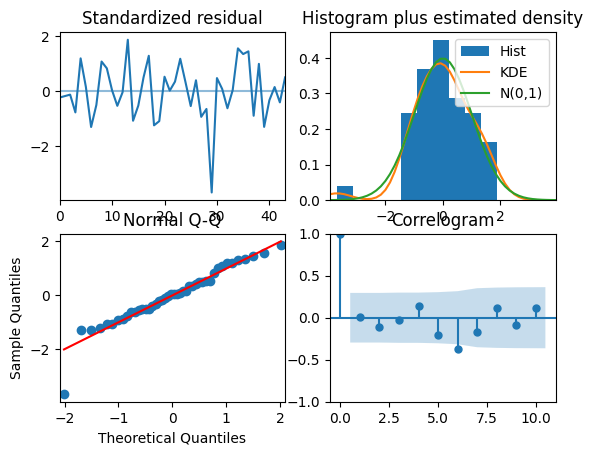

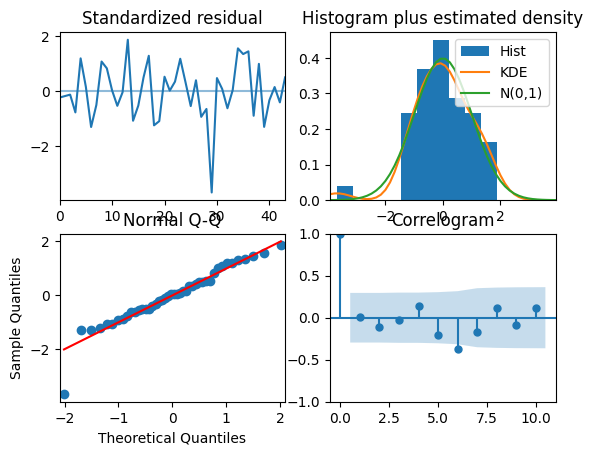

In [14]:
arima_model.plot_diagnostics()

# Trying manual ARIMA

In [ ]:
import itertools
import numpy as np
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'df' is your DataFrame and contains 'SQALE_INDEX' and external regressors

# Define the ranges for d and D since we are manually iterating over these
d_range = D_range = range(0, 3)
s = 12  # Seasonal period

best_aic = np.inf
best_model_cfg = None
best_regressors = None

# Iterate over d and D values
for d in d_range:
    for D in D_range:
        # Use auto_arima to find the best p, q, P, Q given d and D
        try:
            auto_arima_model = auto_arima(df['SQALE_INDEX'], start_p=1, start_q=1,
                                          max_p=5, max_q=5, d=d, D=D, start_P=1, start_Q=1,
                                          max_P=2, max_Q=2, m=s, seasonal=True,
                                          stepwise=True, suppress_warnings=True,
                                          error_action='ignore', trace=False)

            # Extract the best ARIMA order and seasonal order found by auto_arima
            p, q = auto_arima_model.order[0], auto_arima_model.order[2]
            P, Q = auto_arima_model.seasonal_order[0], auto_arima_model.seasonal_order[2]
            
            print(f"Best p, q combination: {p} {q} - Seasonal: {P} {Q}")
            print(f"d: {d}, D: {D}")
            # Begin backward selection of regressors
            current_regressors = df.iloc[:, 2:].columns.tolist()
            while current_regressors:
                tmp_X = df[current_regressors]
                model = SARIMAX(df['SQALE_INDEX'], exog=tmp_X, order=(p, d, q),
                                seasonal_order=(P, D, Q, s),
                                enforce_stationarity=True, enforce_invertibility=True)
                results = model.fit(disp=0)
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_model_cfg = ((p, d, q), (P, D, Q, s))
                    best_regressors = current_regressors.copy()

                if len(current_regressors) > 1:
                    aic_with_regressor_removed = []
                    for regressor in current_regressors:
                        try_regressors = current_regressors.copy()
                        try_regressors.remove(regressor)
                        tmp_X_try = df[try_regressors]
                        model_try = SARIMAX(df['SQALE_INDEX'], exog=tmp_X_try, order=(p, d, q),
                                            seasonal_order=(P, D, Q, s),
                                            enforce_stationarity=True, enforce_invertibility=True)
                        results_try = model_try.fit(disp=0)
                        aic_with_regressor_removed.append((results_try.aic, regressor))
                    aic_with_regressor_removed.sort()
                    current_regressors.remove(aic_with_regressor_removed[0][1])
                else:
                    break  # Stop if only one regressor left
                print(f"Number of remaining predictors: {len(current_regressors)}")
        except Exception as e:
            print(f"Error with configuration: {(d, D)} - {str(e)}")
            continue

print(f"Best SARIMAX{best_model_cfg} - AIC:{best_aic} with regressors {best_regressors}")

In [7]:
best_model_cfg

((0, 2, 1), (0, 2, 1, 12))

In [14]:
best_model_cfg[0][2]

((0, 2, 1), (0, 2, 1, 12))

In [26]:
results_try.bic

392.6293578636045

# Trying Python's OLS function

In [2]:
df = pd.read_csv("/Users/mrobredo23/OULU/PROMISE-TDpred2024/data/biweekly_data/archiva.csv")
df.COMMIT_DATE = pd.to_datetime(df.COMMIT_DATE)

# Dependent variable
sqale_index = df.SQALE_INDEX.to_numpy()

# Independent variables
xregressors = df.iloc[:, 2:].to_numpy()

# Initial data splitting.
split_point = round(len(sqale_index)*0.8)
training_sqale = sqale_index[:split_point]
testing_sqale = sqale_index[split_point:]
training_xregressors = xregressors[:split_point]
testing_xregressors = xregressors[split_point:]

variable_names = df.columns[1:]
xregresors_names = variable_names[1:]

In [11]:
len(xregresors_names)

15

In [12]:
training_xregressors = sm.add_constant(training_xregressors)
olsmod = sm.OLS(training_sqale, training_xregressors).fit()

In [14]:
print(olsmod.summary())
print(olsmod.aic)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     855.5
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.27e-23
Time:                        11:53:22   Log-Likelihood:                -315.28
No. Observations:                  35   AIC:                             662.6
Df Residuals:                      19   BIC:                             687.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7506.4735   7610.689     -0.986      0.3

# Fixing SARIMAX error

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def model_testing(training_df, testing_df, best_model_cfg, best_regressors):
    """
    Given the best model order parameters obtained from the backward variable selection and aut_arima tuning we
    fit the SARIMAX model for forecasting
    """

    arima_order = best_model_cfg[0]
    s_order = best_model_cfg[1]

    predictions = []

    for i in range(len(testing_df)):
        # Training the SARIMAX model
        X_train = training_df[best_regressors]
        y_train = training_df['SQALE_INDEX']

        # Model fitting
        model = SARIMAX(y_train, exog=X_train, order=arima_order, seasonal_order=s_order,
                        enforce_stationarity=True, enforce_invertibility=True)
        fitted_model = model.fit(disp=0)
        print(f"model fit {i} times")

        # Model forecasting
        best_reg_df = testing_df[best_regressors]
        X_test = best_reg_df.iloc[i, :].values.reshape(1, -1)
        y_pred = fitted_model.forecast(exog=X_test)
        predictions.append(y_pred.values[0])

        # Expand the training data for next iteration
        new_obs = testing_df.iloc[i, :]
        training_df = pd.concat([training_df, new_obs], ignore_index=True)

    return predictions, round(fitted_model.aic, 2), round(fitted_model.bic, 2)

split_point = round(len(sqale_index)*0.8)  # Initial data splitting. (80% training 20% testing)
training_df = df.iloc[:split_point, :]
testing_df = df.iloc[split_point:, :]
a, b, c = model_testing(training_df, testing_df, ((0, 1, 1), (3, 1, 0, 26)), ['S1213', 'S00122', 'S1488', 'S1905', 'DuplicatedBlocks', 'S1226', 'S00112', 'S1151', 'S1132'])

/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


model fit 0 times


MissingDataError: exog contains inf or nans

In [3]:
from selenium import webdriver
from selenium.webdriver import FirefoxOptions
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


service = webdriver.FirefoxService(executable_path="/usr/bin/geckodriver")
# print(service)

opts = FirefoxOptions()
opts.add_argument("--headless")
driver = webdriver.Firefox(service=service, options=opts)
# driver = webdriver.Firefox(executable_path=GeckoDriverManager().install())


#try:
# Navigate to the page
driver.get(" https://doi.org/10.1109/icact.2005.246060")
element = WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.CLASS_NAME, "section")))
elements = driver.find_elements(By.CLASS_NAME, 'section')
for element in elements:
    print(element.text.split('\n'))

ModuleNotFoundError: No module named 'selenium'

# Checking sample data shape

In [4]:
df = pd.read_csv("/Users/mrobredo23/OULU/PROMISE-TDpred2024/data/biweekly_data/archiva.csv")
df.COMMIT_DATE = pd.to_datetime(df.COMMIT_DATE)

# Dependent variable
sqale_index = df.SQALE_INDEX.to_numpy()

# Independent variables
xregressors = df.iloc[:, 2:].to_numpy()

# Initial data splitting.
split_point = round(len(sqale_index)*0.8)
training_sqale = sqale_index[:split_point]
testing_sqale = sqale_index[split_point:]
training_xregressors = xregressors[:split_point]
testing_xregressors = xregressors[split_point:]

variable_names = df.columns[1:]
xregresors_names = variable_names[1:]

In [8]:
df_S1213_log = np.log1p(df.S1213)

<Axes: >

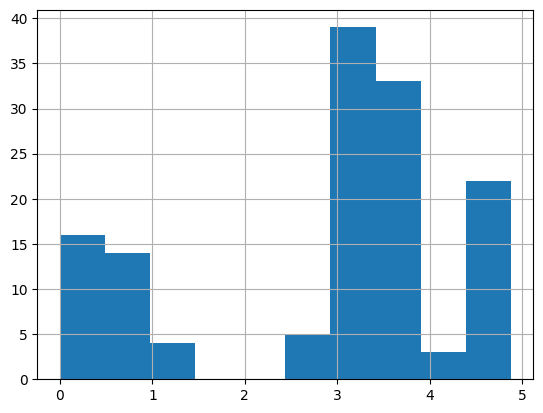

In [9]:
df_S1213_log.hist()

In [22]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
scaler = MinMaxScaler(feature_range=(0,1))
df_S1213_log = scaler.fit_transform(df.S1213.to_numpy().reshape(-1,1))

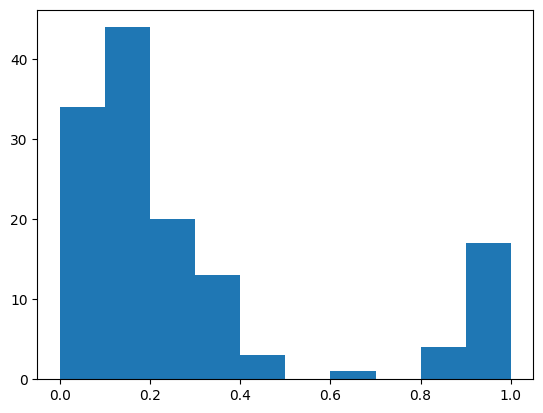

In [25]:
plt.hist(df_S1213_log, bins='auto')
plt.show()

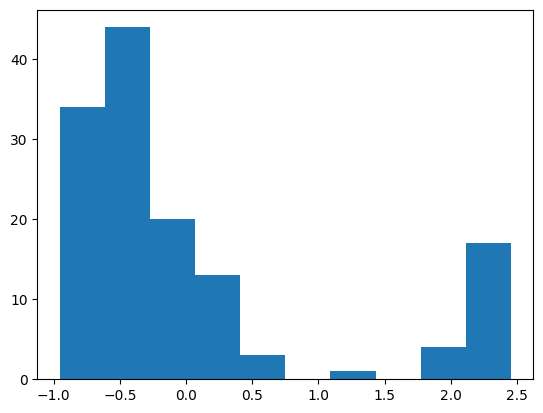

In [27]:
from sklearn.preprocessing import StandardScaler

z_scaler = StandardScaler()
df_scaled = z_scaler.fit_transform(df_S1213_log)
plt.hist(df_scaled, bins='auto')
plt.show()

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler

def model_testing(training_df, testing_df, best_model_cfg, best_regressors):
    """
    Given the best model order parameters obtained from the backward variable selection and aut_arima tuning we
    fit the SARIMAX model for forecasting
    """

    arima_order = best_model_cfg[0]
    s_order = best_model_cfg[1]

    predictions = []

    for i in range(len(testing_df)):
        # Training the SARIMAX model
        X_train = training_df[best_regressors]
        y_train = training_df['SQALE_INDEX']
        # X_train_scaled = np.log1p(X_train)
        scaler = MinMaxScaler(feature_range=(0,1))
        X_train_scaled = scaler.fit_transform(X_train)
         
        # Model fitting
        model = SARIMAX(y_train, exog=X_train_scaled, order=arima_order, seasonal_order=s_order)
        # , enforce_stationarity=True, enforce_invertibility=True
        fitted_model = model.fit(disp=0)
        print(f"model fit {i} times")

        # Model forecasting
        best_reg_df = testing_df[best_regressors]
        best_reg_df_scaled = np.log1p(best_reg_df)
        X_test = best_reg_df_scaled.iloc[i, :].values.reshape(1, -1)
        print(f"X_test: {X_test[0]}")
        y_pred = fitted_model.forecast(exog=X_test[0])
        predictions.append(y_pred.values[0])

        # Expand the training data for next iteration
        new_obs = testing_df.iloc[i, :]
        training_df = pd.concat([training_df, new_obs], ignore_index=True)

    return predictions, round(fitted_model.aic, 2), round(fitted_model.bic, 2)

best_model_params = (1, 0, 1), (2, 3, 0, 26)
best_aic = -144.89
best_regressors = ['S1213', 'RedundantThrowsDeclarationCheck', 'S00122', 'S1488', 'DuplicatedBlocks', 'S1155',
                   'S1151', 'S1132']
df = pd.read_csv("/Users/mrobredo23/OULU/PROMISE-TDpred2024/data/biweekly_data/archiva.csv")
df.COMMIT_DATE = pd.to_datetime(df.COMMIT_DATE)
sqale_index = df.SQALE_INDEX.to_numpy()
split_point = round(len(sqale_index)*0.8)  # Initial data splitting. (80% training 20% testing)
training_df = df.iloc[:split_point, :]
testing_df = df.iloc[split_point:, :]

predictions, aic_val, bic_val = model_testing(training_df=training_df, testing_df=testing_df,
                                              best_model_cfg=best_model_params, best_regressors=best_regressors)

/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


model fit 0 times
X_test: [3.04452244 4.44265126 0.69314718 3.04452244 4.75359019 2.07944154
 1.09861229 3.73766962]


KeyboardInterrupt: 

In [5]:
testing_df

,COMMIT_DATE,SQALE_INDEX,S1213,RedundantThrowsDeclarationCheck,S00117,S00122,S1488,S1905,UselessImportCheck,DuplicatedBlocks,S1226,S00112,S1155,S00108,S1151,S1132,S1481
109,2010-12-09 14:02:45,69831.000000,20.0,84.0,7.0,1.0,20.0,14.0,73.0,115.0,15.0,99.0,7.0,3.0,2.0,41.0,14.0
110,2010-12-29 06:14:04,71028.000000,22.0,85.0,7.0,1.0,20.0,14.0,75.0,118.0,15.0,104.0,7.0,3.0,2.0,41.0,14.0
111,2011-01-12 06:14:04,71382.500000,22.0,85.0,7.0,1.0,20.0,14.0,74.5,117.5,15.0,104.5,7.0,3.0,2.0,41.0,13.5
112,2011-01-28 03:19:09,71737.000000,22.0,85.0,7.0,1.0,20.0,14.0,74.0,117.0,15.0,105.0,7.0,3.0,2.0,41.0,13.0
113,2011-02-11 03:19:09,71728.333333,22.0,85.0,7.0,1.0,20.0,14.0,74.0,117.0,15.0,105.0,7.0,3.0,2.0,41.0,13.0
114,2011-02-25 03:19:09,71719.666667,22.0,85.0,7.0,1.0,20.0,14.0,74.0,117.0,15.0,105.0,7.0,3.0,2.0,41.0,13.0
115,2011-03-16 14:53:40,71711.000000,22.0,85.0,7.0,1.0,20.0,14.0,74.0,117.0,15.0,105.0,7.0,3.0,2.0,41.0,13.0
116,2011-04-12 07:16:34,71722.000000,22.0,85.0,7.0,1.0,20.0,14.0,74.0,117.0,15.0,105.0,7.0,3.0,2.0,41.0,13.0
117,2011-04-29 11:30:08,71788.000000,22.0,85.0,7.0,1.0,20.0,14.0,75.0,118.0,15.0,105.0,7.0,3.0,2.0,41.0,13.0
118,2011-05-19 22:20:55,74380.000000,22.0,85.0,7.0,1.0,21.0,14.0,83.0,121.0,15.0,114.0,7.0,3.0,2.0,41.0,13.0


# Reading CSV files from complete data
- The files are encoded in Windows-1252

In [5]:
with open("/Users/mrobredo23/OULU/PROMISE-TDpred2024/data/complete_data/archiva.csv", 'rb') as f:
    content = f.read()  # Read the file in binary mode
decoded_content = content.decode('windows-1252', errors='ignore')

In [7]:
from io import StringIO
complete_df = pd.read_csv(StringIO(decoded_content))

In [9]:
type(complete_df)

pandas.core.frame.DataFrame

In [3]:
range_d = [0]

for i in range(len(range_d)):
    print(i)

0


# Examining output for auto_arima function with stepwise order identification

In [5]:
s = 26
seasonality = True
order = pmd.auto_arima(df['SQALE_INDEX'], m=s, seasonal=seasonality,
                   stepwise=True, suppress_warnings=True, trace=True,
                   information_criterion='aic')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[26] intercept   : AIC=2707.642, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[26] intercept   : AIC=2742.488, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[26] intercept   : AIC=2745.844, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[26] intercept   : AIC=2738.365, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[26]             : AIC=2743.184, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[26] intercept   : AIC=2706.919, Time=0.51 sec
 ARIMA(2,1,2)(0,0,0)[26] intercept   : AIC=2705.940, Time=0.03 sec
 ARIMA(2,1,2)(1,0,0)[26] intercept   : AIC=2707.221, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[26] intercept   : AIC=2716.398, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[26] intercept   : AIC=2704.447, Time=0.02 sec
 ARIMA(2,1,1)(1,0,0)[26] intercept   : AIC=2705.764, Time=0.11 sec
 ARIMA(2,1,1)(0,0,1)[26] intercept   : AIC=2705.418, Time=0.50 sec
 ARIMA(2,1,1)(1,0,1)[26] intercept   : AIC=2705.645, Time=0.80 sec
 ARIMA(1,1,1)(0,0,0)[26] intercept   : AIC=2728.570, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0

# Checking format of the results for error handling

In [4]:
df = pd.read_csv("/Users/mrobredo23/OULU/PROMISE-TDpred2024/data/sarimax_results/biweekly_results/batik.csv")
df.columns

Index(['PROJECT', 'MAPE', 'MSE', 'MAE', 'RMSE', 'AIC', 'BIC'], dtype='object')

In [5]:
df.head()

,PROJECT,MAPE,MSE,MAE,RMSE,AIC,BIC
0,batik,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
len(df)

1

# Plot examples

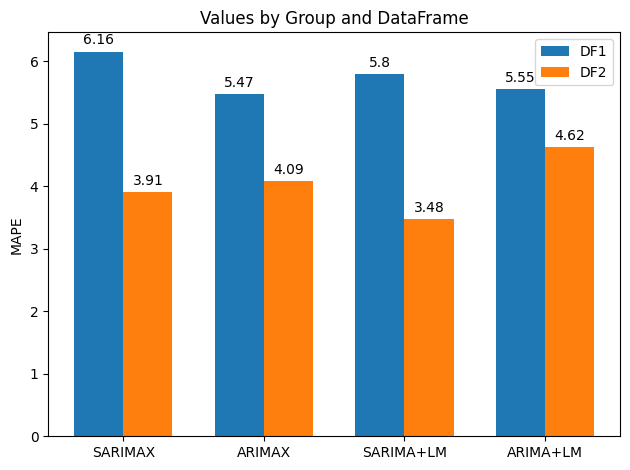

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example DataFrames
np.random.seed(0)  # For reproducible outputs
df1 = pd.DataFrame({
    'SARIMAX': np.random.rand(10),
    'ARIMAX': np.random.rand(10),
    'SARIMA+LM': np.random.rand(10),
    'ARIMA+LM': np.random.rand(10),
})

df2 = pd.DataFrame({
    'SARIMAX': np.random.rand(10),
    'ARIMAX': np.random.rand(10),
    'SARIMA+LM': np.random.rand(10),
    'ARIMA+LM': np.random.rand(10),
})

# List of values (assuming these are column names in this context)
values_list = ['SARIMAX', 'ARIMAX', 'SARIMA+LM', 'ARIMA+LM']

# Compute some statistic for these values in both DataFrames, e.g., sum
sums_df1 = df1[values_list].sum()
sums_df2 = df2[values_list].sum()

# Preparing data for plotting
plot_data = pd.DataFrame({'DF1': sums_df1, 'DF2': sums_df2})

# Plotting
fig, ax = plt.subplots()
x = np.arange(len(values_list))  # the label locations
width = 0.35  # the width of the bars

# Creating bars
rects1 = ax.bar(x - width/2, plot_data['DF1'], width, label='DF1')
rects2 = ax.bar(x + width/2, plot_data['DF2'], width, label='DF2')

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('MAPE')
ax.set_title('Values by Group and DataFrame')
ax.set_xticks(x)
ax.set_xticklabels(values_list)
ax.legend()

# Function to auto-label the bars, if desired
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function to label bars
autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


In [7]:
sums_df1

SARIMAX      6.157663
ARIMAX       5.473434
SARIMA+LM    5.802513
ARIMA+LM     5.554397
dtype: float64

In [9]:
# List of values (assuming these are column names in this context)
values_list = ['SARIMAX', 'ARIMAX', 'SARIMA+LM', 'ARIMA+LM']

# Compute some statistic for these values in both DataFrames, e.g., sum
sums_df1 = df1[values_list].sum()
sums_df2 = df2[values_list].sum()

# Preparing data for plotting
plot_data = pd.DataFrame({'DF1': sums_df1, 'DF2': sums_df2})

# Plotting
fig, ax = plt.subplots()
x = np.arange(len(values_list))  # the label locations
width = 0.35  # the width of the bars

# Creating bars
rects1 = ax.bar(x - width/2, plot_data['DF1'], width, label='DF1')
rects2 = ax.bar(x + width/2, plot_data['DF2'], width, label='DF2')

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('MAPE')
ax.set_title('Values by Group and DataFrame')
ax.set_xticks(x)
ax.set_xticklabels(values_list)
ax.legend()

# Function to auto-label the bars, if desired
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function to label bars
autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


SARIMAX      6.157663
ARIMAX       5.473434
SARIMA+LM    5.802513
ARIMA+LM     5.554397
dtype: float64

AttributeError: 'RadarAxes' object has no attribute 'flat'

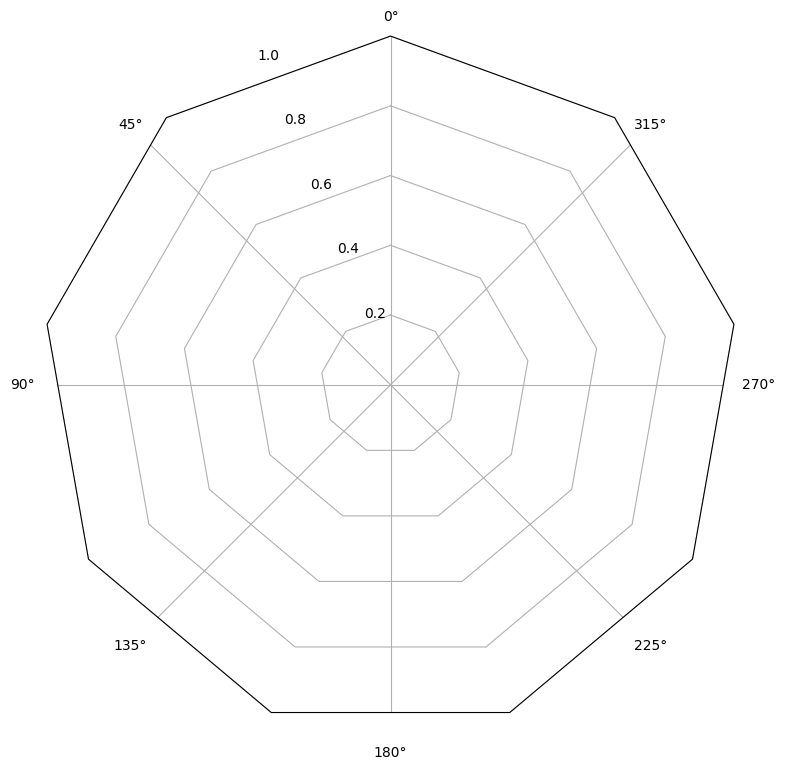

In [26]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


def example_data():
    # The following data is from the Denver Aerosol Sources and Health study.
    # See doi:10.1016/j.atmosenv.2008.12.017
    #
    # The data are pollution source profile estimates for five modeled
    # pollution sources (e.g., cars, wood-burning, etc) that emit 7-9 chemical
    # species. The radar charts are experimented with here to see if we can
    # nicely visualize how the modeled source profiles change across four
    # scenarios:
    #  1) No gas-phase species present, just seven particulate counts on
    #     Sulfate
    #     Nitrate
    #     Elemental Carbon (EC)
    #     Organic Carbon fraction 1 (OC)
    #     Organic Carbon fraction 2 (OC2)
    #     Organic Carbon fraction 3 (OC3)
    #     Pyrolyzed Organic Carbon (OP)
    #  2)Inclusion of gas-phase specie carbon monoxide (CO)
    #  3)Inclusion of gas-phase specie ozone (O3).
    #  4)Inclusion of both gas-phase species is present...
    data = [
        ['SARIMAX', 'SARIMA+LM', 'MLR', 'L1', 'L2', 'SGD', 'XGB', 'RF', 'SVM'],
        ('MAPE', [
            [0.88, 0.01, 0.03, 0.03, 0.00, 0.06, 0.01, 0.00, 0.00],
            [0.07, 0.95, 0.04, 0.05, 0.00, 0.02, 0.01, 0.00, 0.00],
            [0.01, 0.02, 0.85, 0.19, 0.05, 0.10, 0.00, 0.00, 0.00],
            [0.02, 0.01, 0.07, 0.01, 0.21, 0.12, 0.98, 0.00, 0.00],
            [0.01, 0.01, 0.02, 0.71, 0.74, 0.70, 0.00, 0.00, 0.00]]),
        ('MAE', [
            [0.88, 0.02, 0.02, 0.02, 0.00, 0.05, 0.00, 0.05, 0.00],
            [0.08, 0.94, 0.04, 0.02, 0.00, 0.01, 0.12, 0.04, 0.00],
            [0.01, 0.01, 0.79, 0.10, 0.00, 0.05, 0.00, 0.31, 0.00],
            [0.00, 0.02, 0.03, 0.38, 0.31, 0.31, 0.00, 0.59, 0.00],
            [0.02, 0.02, 0.11, 0.47, 0.69, 0.58, 0.88, 0.00, 0.00]]),
        ('RMSE', [
            [0.89, 0.01, 0.07, 0.00, 0.00, 0.05, 0.00, 0.00, 0.03],
            [0.07, 0.95, 0.05, 0.04, 0.00, 0.02, 0.12, 0.00, 0.00],
            [0.01, 0.02, 0.86, 0.27, 0.16, 0.19, 0.00, 0.00, 0.00],
            [0.01, 0.03, 0.00, 0.32, 0.29, 0.27, 0.00, 0.00, 0.95],
            [0.02, 0.00, 0.03, 0.37, 0.56, 0.47, 0.87, 0.00, 0.00]])
    ]
    return data


if __name__ == '__main__':
    N = 9
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, axs = plt.subplots(figsize=(9, 9), nrows=1, ncols=1,
                            subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.40, top=0.85, bottom=0.05)

    colors = ['b', 'r', 'g', 'm', 'y']
    # Plot the four cases from the example data on separate axes
    for ax, (title, case_data) in zip(axs.flat, data):
        ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25, label='_nolegend_')
        ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ('MAPE')
    legend = axs[0, 0].legend(labels, loc=(1, .95),
                              labelspacing=0.1, fontsize='small')
    
    fig.text(0.5, 0.965, '',
             horizontalalignment='center', color='black', weight='bold',
             size='large')
    
    plt.show()

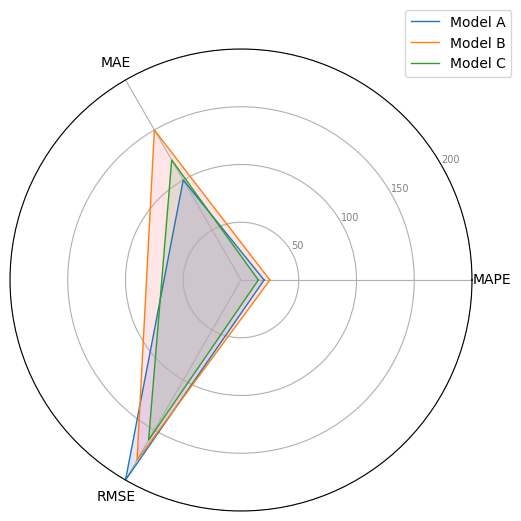

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Data
metrics = ['MAPE', 'MAE', 'RMSE']
models = {'Model A': [20, 100, 200],
          'Model B': [25, 150, 180],
          'Model C': [15, 120, 160]}

# Number of variables we're plotting.
num_vars = len(metrics)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * pi, num_vars, endpoint=False).tolist()

# The radar chart plots a circle, so we need to "complete the loop"
# and append the start value to the end.
models['Model A'] += models['Model A'][:1]
models['Model B'] += models['Model B'][:1]
models['Model C'] += models['Model C'][:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], metrics)

# Draw ylabels
ax.set_rlabel_position(30)
plt.yticks([50, 100, 150, 200], ["50", "100", "150", "200"], color="grey", size=7)
plt.ylim(0,200)

# Plot each model's line
ax.plot(angles, models['Model A'], linewidth=1, linestyle='solid', label='Model A')
ax.fill(angles, models['Model A'], 'b', alpha=0.1)

ax.plot(angles, models['Model B'], linewidth=1, linestyle='solid', label='Model B')
ax.fill(angles, models['Model B'], 'r', alpha=0.1)

ax.plot(angles, models['Model C'], linewidth=1, linestyle='solid', label='Model C')
ax.fill(angles, models['Model C'], 'g', alpha=0.1)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()

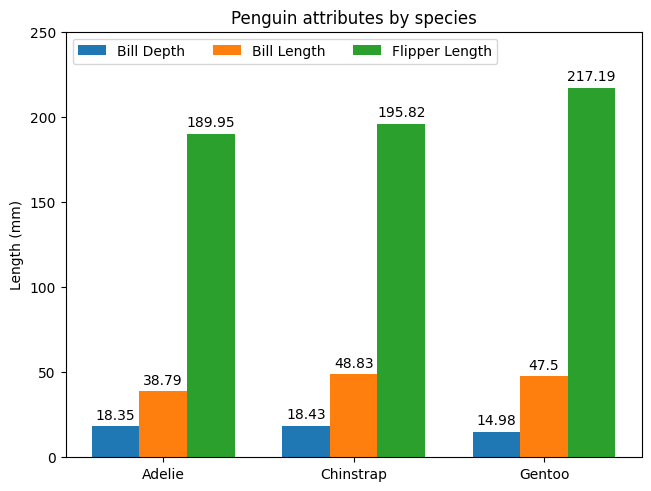

In [8]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

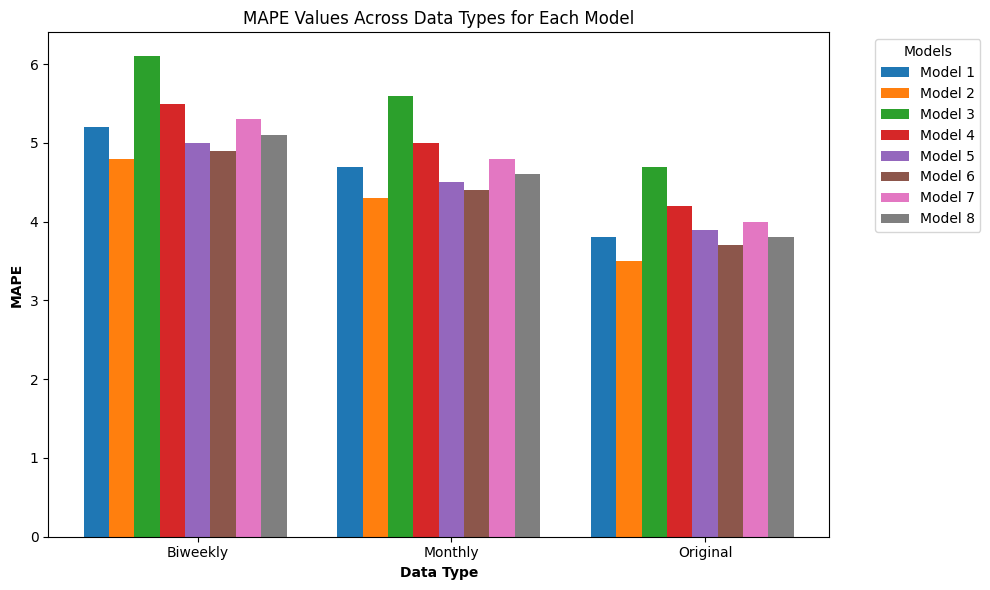

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming we have 8 models and 3 data types
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4',
          'Model 5', 'Model 6', 'Model 7', 'Model 8']
data_types = ['Biweekly', 'Monthly', 'Original']

# Sample MAPE values for each model in each data type
mape_values = {
    'Biweekly': [5.2, 4.8, 6.1, 5.5, 5.0, 4.9, 5.3, 5.1],
    'Monthly': [4.7, 4.3, 5.6, 5.0, 4.5, 4.4, 4.8, 4.6],
    'Original': [3.8, 3.5, 4.7, 4.2, 3.9, 3.7, 4.0, 3.8]
}

# Set up the bar width and initial position
bar_width = 0.1
initial_r = np.arange(len(data_types))

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Generate bars for each model
for idx, model in enumerate(models):
    r = [x + (bar_width * idx) for x in initial_r]
    mape_scores = [mape_values[dt][idx] for dt in data_types]
    ax.bar(r, mape_scores, width=bar_width, label=model)

# Add xticks on the middle of the group bars
ax.set_xticks([r + bar_width*(len(models)/2) for r in range(len(data_types))])
ax.set_xticklabels(data_types)

# Set axis labels and title
ax.set_xlabel('Data Type', fontweight='bold')
ax.set_ylabel('MAPE', fontweight='bold')
ax.set_title('MAPE Values Across Data Types for Each Model')

# Create legend
ax.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


In [ ]:
values_list = ['SARIMAX', 'ARIMAX', 'SARIMA+LM', 'ARIMA+LM']  # TS models to be compared towards the seasonality factor
metrics_list = ['MAPE' ,'RMSE', 'MAE']
models_list = ['sarimax_results', 'arimax_results', 'sarima_lm_results', 'arima_lm_results']

# Data sources
biweekly_results_df = pd.read_csv(os.path.join(DATA_PATH, 'final_results', 'biweekly_data_results.csv')).set_index('Approach')
biweekly_results_df = biweekly_results_df.rename(index={'sarimax_results': 'SARIMAX', 'arimax_results': 'ARIMAX', 'sarima_lm_results': 'SARIMA+LM', 'arima_lm_results': 'ARIMA+LM'})

monthly_results_df = pd.read_csv(os.path.join(DATA_PATH, 'final_results', 'monthly_data_results.csv')).set_index('Approach')
monthly_results_df = monthly_results_df.rename(index={'sarimax_results': 'SARIMAX', 'arimax_results': 'ARIMAX', 'sarima_lm_results': 'SARIMA+LM', 'arima_lm_results': 'ARIMA+LM'})


# Function to auto-label the bars, if desired
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        five_percent = height*0.1
        #print(f"height: {height}")
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height-five_percent),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=15)
# plt.rcParams["figure.figsize"] = (6.4, 6)
for i in range(len(metrics_list)):

    biweekly_results = biweekly_results_df.loc[values_list, metrics_list[i]]
    monthly_results = monthly_results_df.loc[values_list, metrics_list[i]]
    plot_data = pd.DataFrame({'biweekly': biweekly_results, 'monthly': monthly_results})
    # Plotting
    fig, ax = plt.subplots()
    x = np.arange(len(values_list))  # the label locations
    width = 0.45  # the width of the bars

    # Creating bars
    if i == 0:
        rects1 = ax.bar(x - width/2, plot_data['biweekly'], width, label='biweekly', color='#DCDCDC')
        rects2 = ax.bar(x + width/2, plot_data['monthly'], width, label='monthly', color='#5A8DBF')
    else:
        rects1 = ax.bar(x - width/2, plot_data['biweekly'].round().astype(int), width, label='biweekly', color='#DCDCDC')
        rects2 = ax.bar(x + width/2, plot_data['monthly'].round().astype(int), width, label='monthly', color='#5A8DBF')

    # Adding some text for labels, title, and custom x-axis tick labels, etc.
    ax.set_ylabel(metrics_list[i], fontsize=20)
    ax.set_title('')
    ax.set_xticks(x)
    ax.set_xticklabels(values_list, fontsize=20, rotation=15)
    ax.legend(fontsize=17)

    # Call the function to label bars
    autolabel(rects1)
    autolabel(rects2)
    plt.tight_layout()
    plt.yticks(fontsize=15, rotation=45)
    plt.savefig(os.path.join(DATA_PATH, f'{metrics_list[i]}.pdf'), format='pdf')
    plt.show()


# Combination of results in plot

/var/folders/kb/sw0dnpps1cx45xw8zvrdypc80000gq/T/ipykernel_6037/1837714548.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')
/var/folders/kb/sw0dnpps1cx45xw8zvrdypc80000gq/T/ipykernel_6037/1837714548.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')
/var/folders/kb/sw0dnpps1cx45xw8zvrdypc80000gq/T/ipykernel_6037/1837714548.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')
/var/folders/kb/sw0dnpps1cx45xw8zvrdypc80000gq/T/ipykernel_6037/1837714548.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator

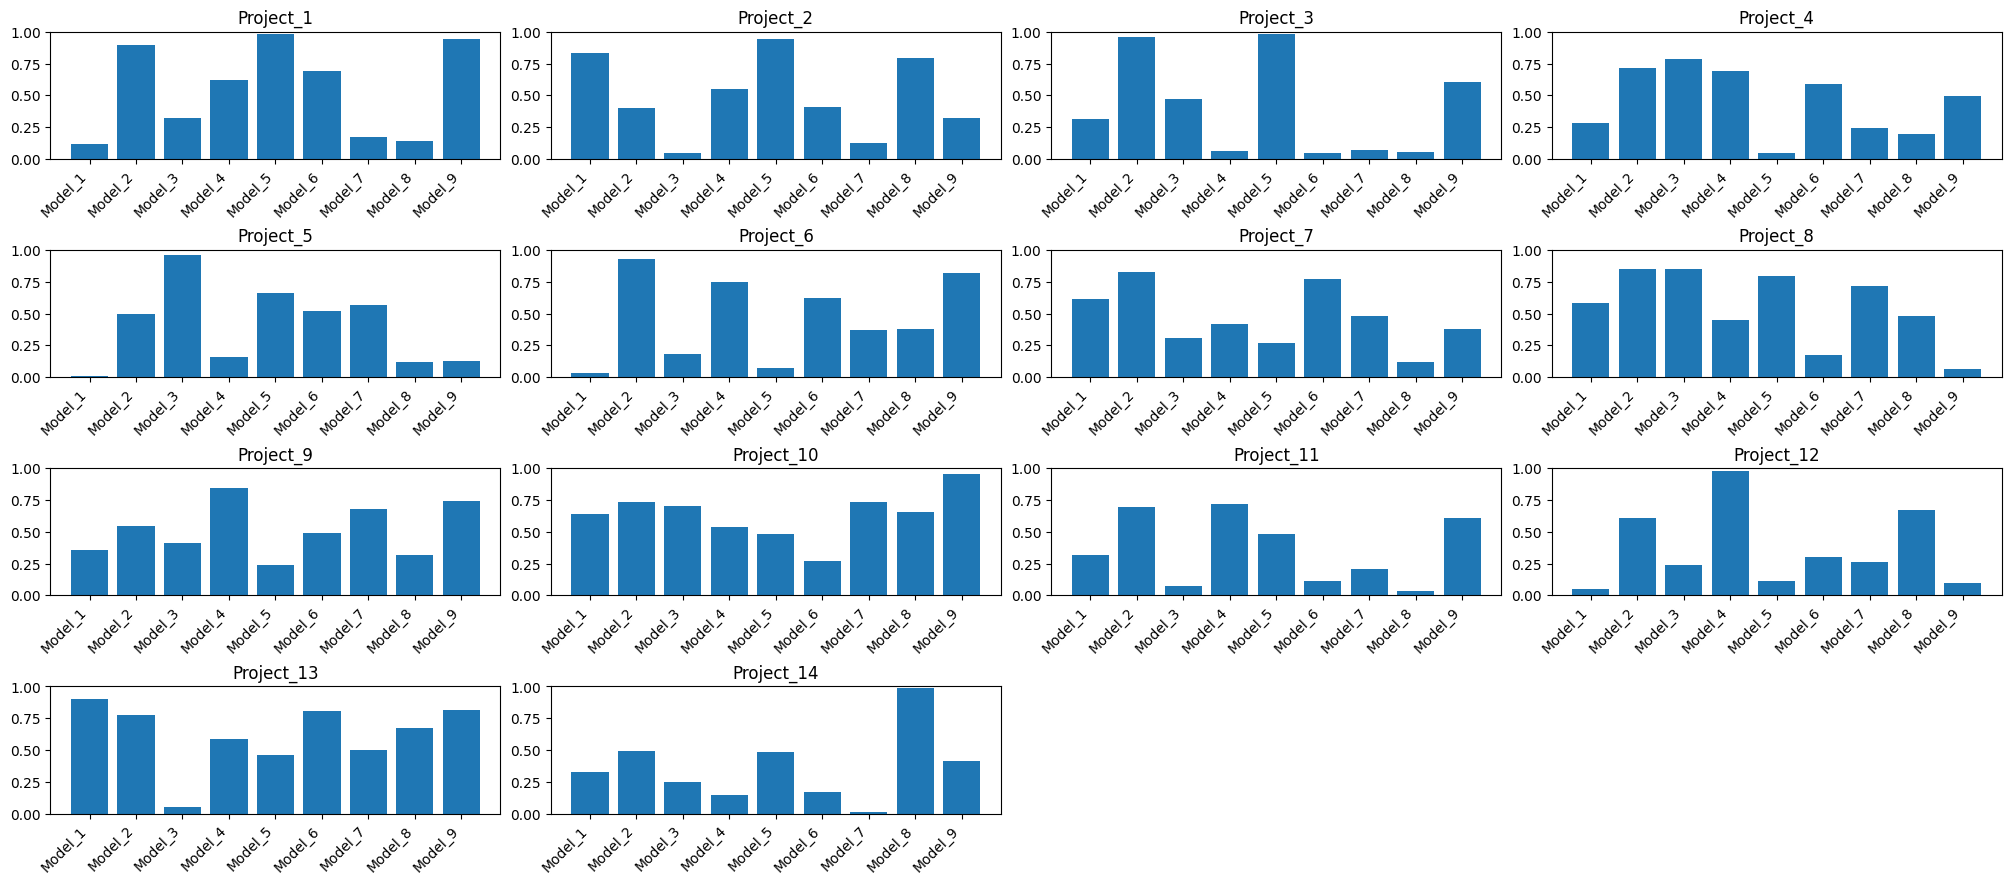

In [4]:
import numpy as np
import pandas as pd

# Sample DataFrame with results from 9 models for 14 projects
projects = [f'Project_{i+1}' for i in range(14)]
models = [f'Model_{j+1}' for j in range(9)]
data = np.random.rand(14, 9)  # Random data for illustration

df = pd.DataFrame(data, index=projects, columns=models)

import matplotlib.pyplot as plt

# Define the number of projects and models
num_projects = len(projects)
num_models = len(models)

# Set up a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 10), constrained_layout=True)
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot each project's results in a separate subplot
for i, (project, ax) in enumerate(zip(projects, axes)):
    ax.bar(models, df.loc[project])
    ax.set_title(project)
    ax.set_ylim(0, 1)  # Assuming the data is normalized between 0 and 1
    ax.set_xticklabels(models, rotation=45, ha='right')

# Hide any unused subplots (if there are any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Show the plot
plt.show()


In [6]:
data

array([[0.11329253, 0.89754092, 0.32230466, 0.62185057, 0.98130016,
        0.68982003, 0.17312808, 0.14391616, 0.94280008],
       [0.83419598, 0.40323065, 0.04755703, 0.55101776, 0.9400586 ,
        0.41144486, 0.12094298, 0.79176508, 0.31879677],
       [0.31107724, 0.95654298, 0.46929403, 0.06173272, 0.98413229,
        0.0434447 , 0.06771125, 0.05039579, 0.60438068],
       [0.28448995, 0.71137828, 0.78193345, 0.69473466, 0.0493206 ,
        0.58565745, 0.24608716, 0.19710045, 0.49713454],
       [0.00479306, 0.49355418, 0.96434612, 0.15798093, 0.66105059,
        0.51908205, 0.56453717, 0.12210732, 0.1285581 ],
       [0.02990457, 0.92557896, 0.1801148 , 0.75185804, 0.06834341,
        0.62556452, 0.37130426, 0.37761687, 0.82240876],
       [0.61824113, 0.8294735 , 0.30876411, 0.42001033, 0.2667852 ,
        0.77294285, 0.48059268, 0.11968377, 0.37456977],
       [0.57959003, 0.84924623, 0.85145725, 0.44628013, 0.79603636,
        0.17253554, 0.71559336, 0.47818829, 0.065051  ],
